Resources:
- https://pbpython.com/effective-matplotlib.html

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from vega_datasets import data

plt.style.use("ggplot")
%load_ext lab_black

# High-resolution plot output for retina displays
%config InlineBackend.figure_format ='retina'

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [65]:
countries = data.countries()
print(countries.shape)
countries.head()

(630, 9)


,_comment,year,fertility,life_expect,n_fertility,n_life_expect,country,p_fertility,p_life_expect
0,Data courtesy of Gapminder.org,1955,7.7,30.332,7.7,31.997,Afghanistan,NaN,NaN
1,NaN,1960,7.7,31.997,7.7,34.020,Afghanistan,7.7,30.332
2,NaN,1965,7.7,34.020,7.7,36.088,Afghanistan,7.7,31.997
3,NaN,1970,7.7,36.088,7.7,38.438,Afghanistan,7.7,34.020
4,NaN,1975,7.7,38.438,7.8,39.854,Afghanistan,7.7,36.088


In [11]:
# plt.style.available

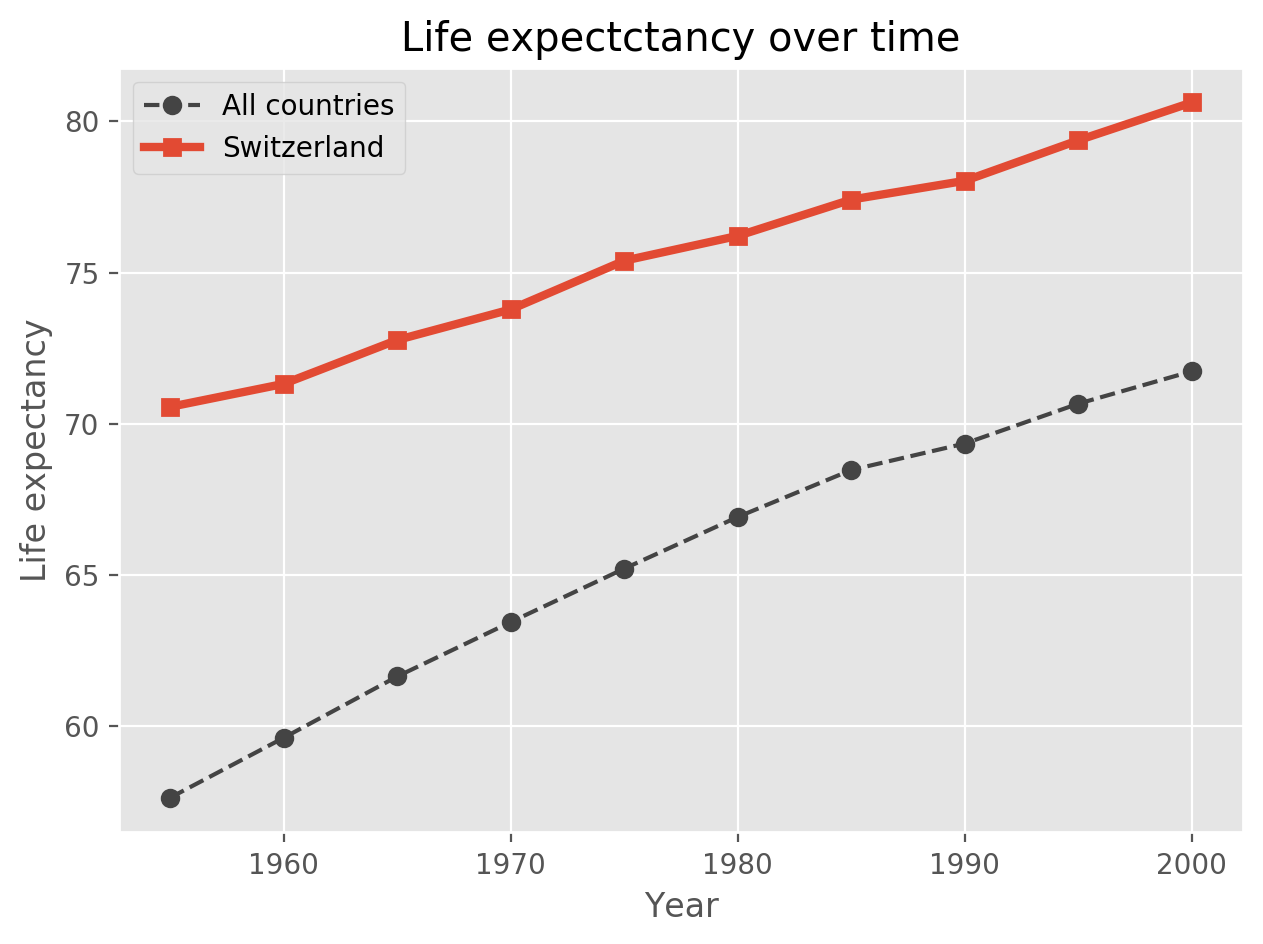

In [10]:
all = countries.groupby("year").mean().reset_index()
ch = countries[countries["country"] == "Switzerland"]
cuba = countries[countries["country"] == "Cuba"]

plt.plot(
    all.year,
    all.life_expect,
    marker="o",
    linestyle="--",
    color="#444444",
    label="All countries",
)

plt.plot(
    ch.year, ch.life_expect, marker="s", linestyle="-", linewidth=3, label="Switzerland"
)

plt.xlabel("Year")
plt.ylabel("Life expectancy")
plt.title("Life expectctancy over time")
plt.tight_layout()
plt.legend()

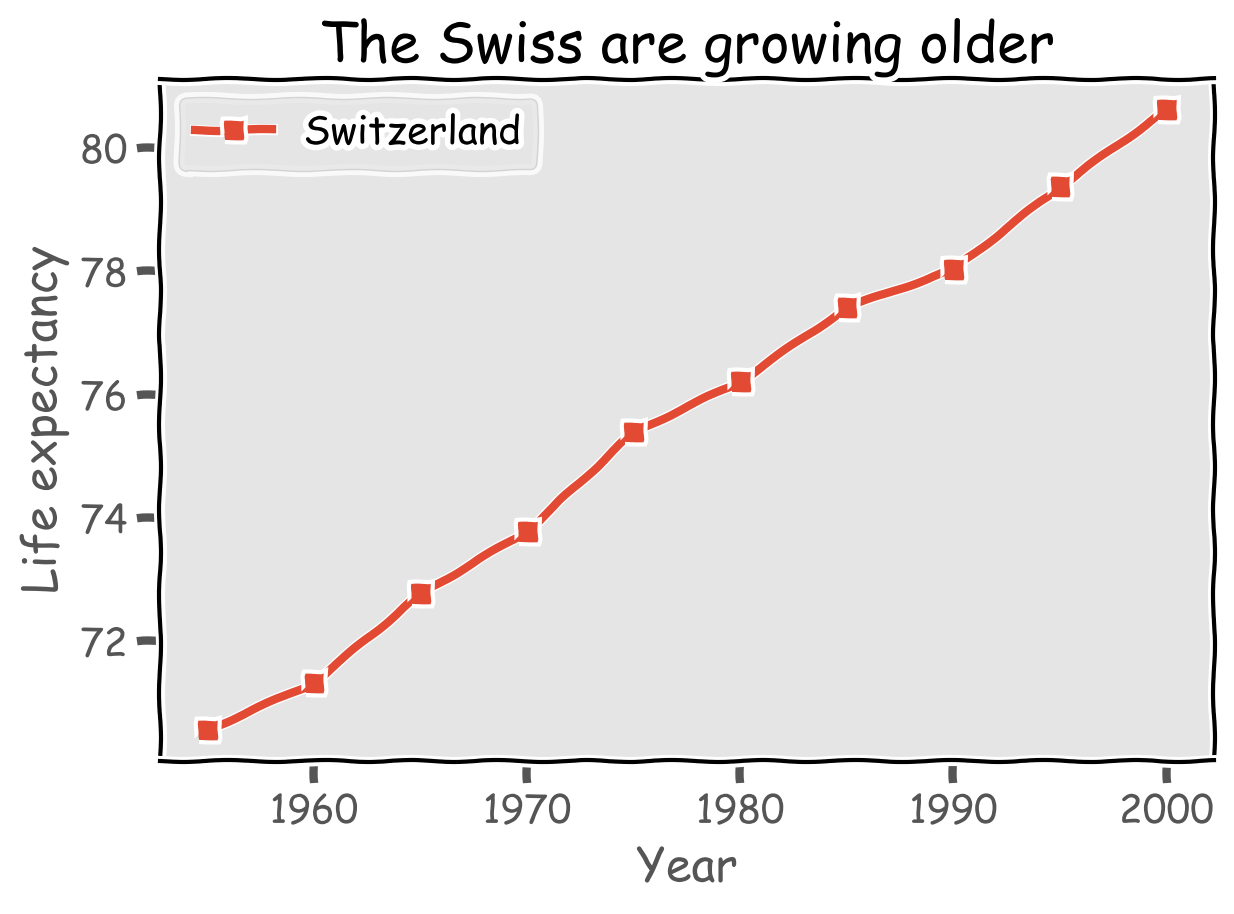

In [21]:
# Using xkcd comic style

with plt.xkcd():

    plt.plot(
        ch.year,
        ch.life_expect,
        marker="s",
        linestyle="-",
        linewidth=3,
        label="Switzerland",
    )

    plt.xlabel("Year")
    plt.ylabel("Life expectancy")
    plt.title("The Swiss are growing older")
    plt.tight_layout()
    plt.legend()

    plt.savefig("./figures/xkcd-example.png")

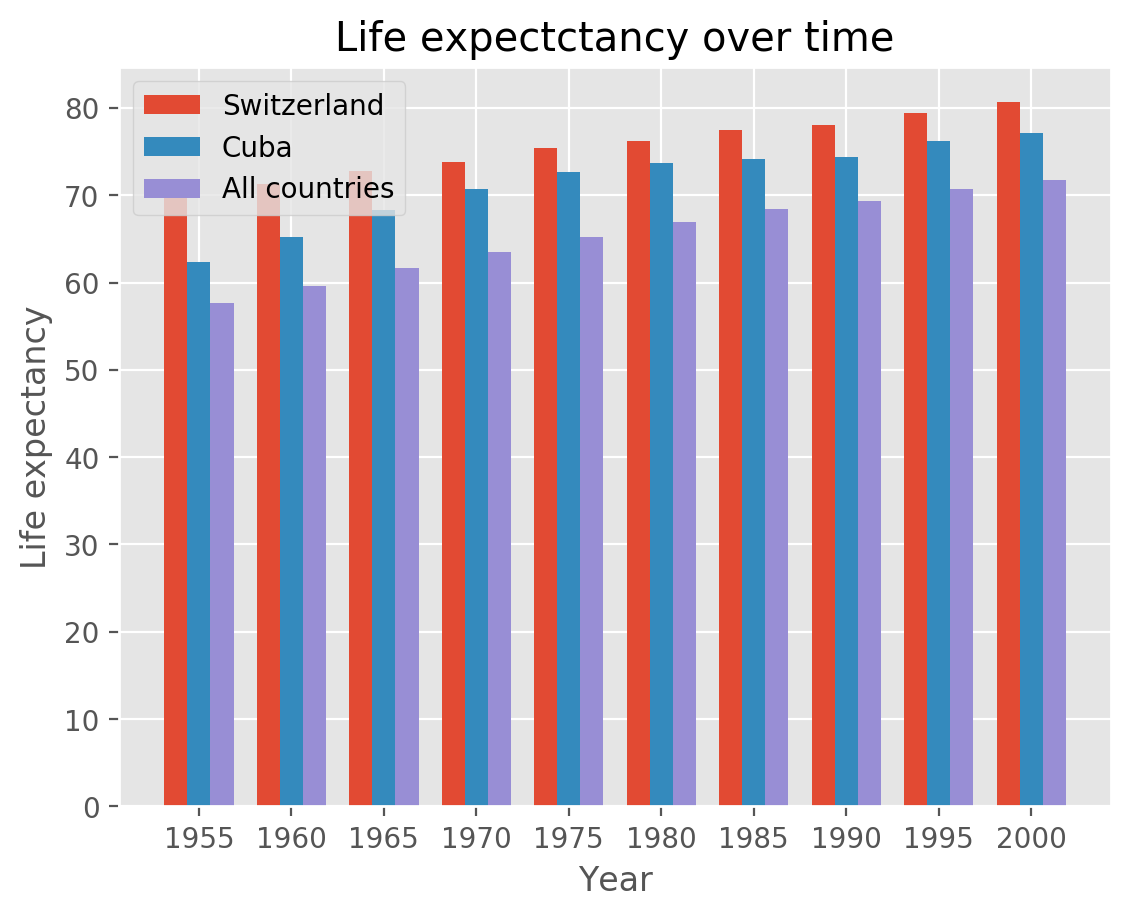

In [48]:
import numpy as np

x_indexes = np.arange(len(all.year))
width = 0.25

plt.bar(x_indexes - width, ch.life_expect, width=width, label="Switzerland")
plt.bar(x_indexes, cuba.life_expect, width=width, label="Cuba")
plt.bar(x_indexes + width, all.life_expect, width=width, label="All countries")

plt.xticks(ticks=x_indexes, labels=all.year)
plt.xlabel("Year")
plt.ylabel("Life expectancy")
plt.title("Life expectctancy over time")
plt.legend()

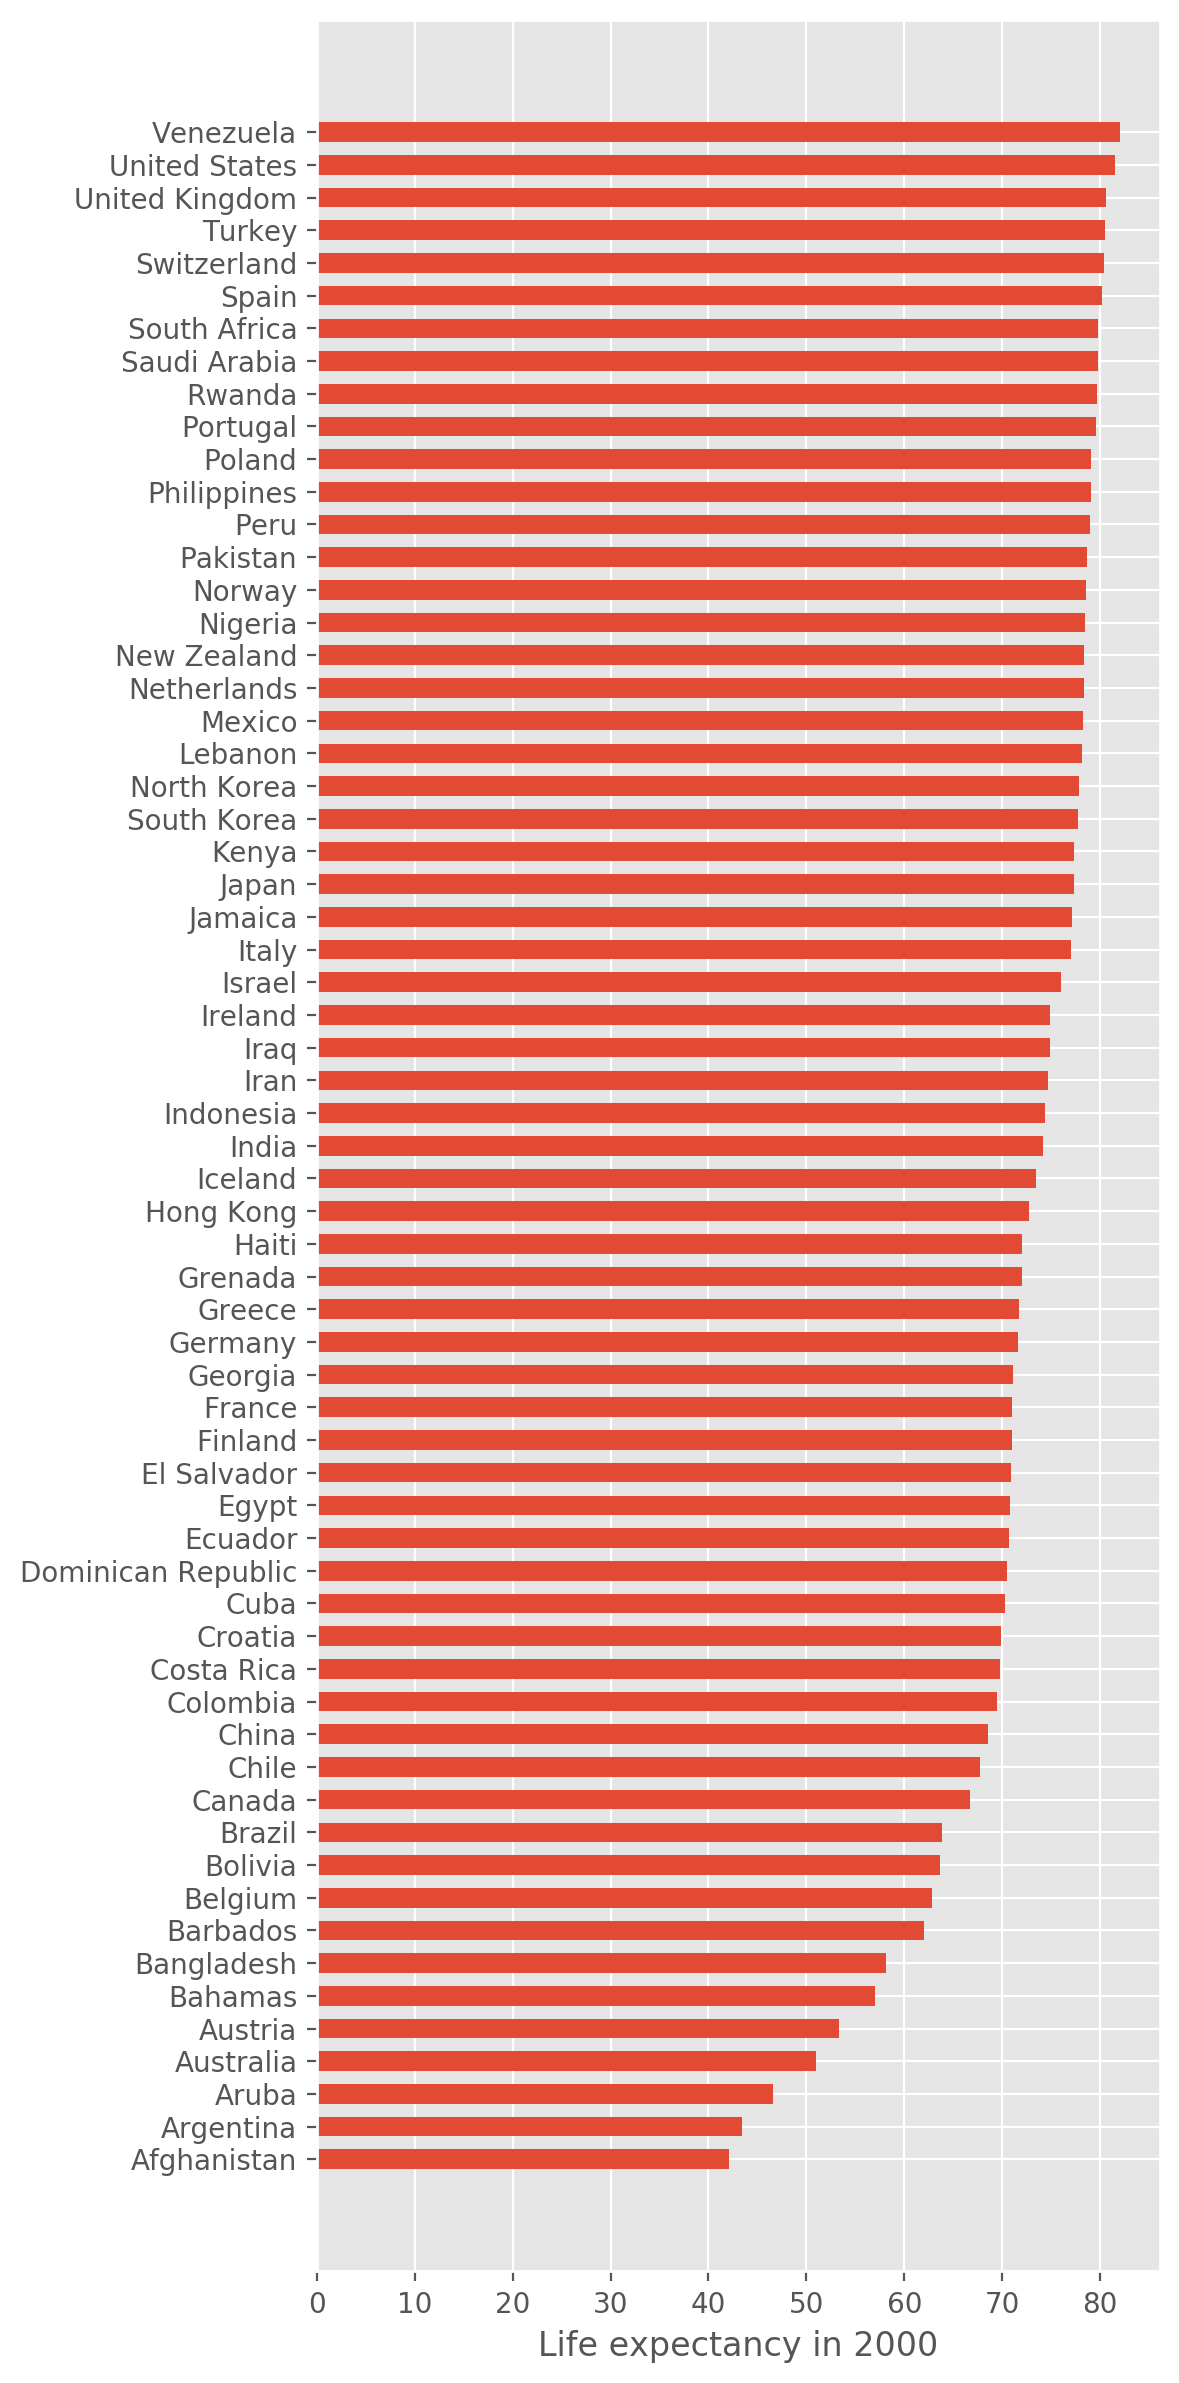

In [136]:
latest = countries[countries["year"] == countries["year"].max()]

fig = plt.subplots(figsize=(6, 12))

plt.barh(latest.country, latest.life_expect.sort_values(), height=0.6)
plt.xlabel("Life expectancy in 2000")

plt.tight_layout()

In [ ]:
plt.barh

In [12]:
df = pd.read_excel(
    "https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true"
)
print(df.shape)
df.head()

(1500, 7)


,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [16]:
top_10 = (
    df.groupby("name")["ext price", "quantity"]
    .agg({"ext price": "sum", "quantity": "count"})
    .sort_values(by="ext price", ascending=False)[:10]
    .reset_index()
)
top_10.rename(
    columns={"name": "Name", "ext price": "Sales", "quantity": "Purchases"},
    inplace=True,
)
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [5]:
plt.style.use('seaborn-darkgrid')

### Using pandas plots to prototype plot

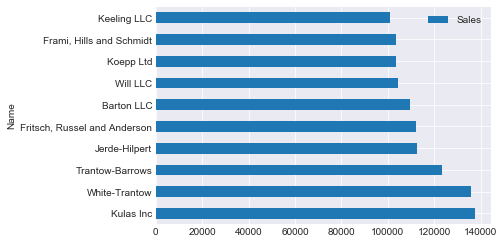

In [6]:
top_10.plot(kind="barh", y="Sales", x="Name")

### Customising using matplotlib ax object

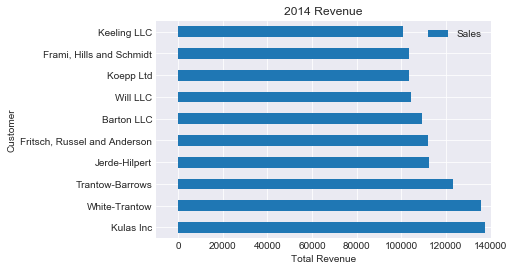

In [7]:
# Combine quickness of pandas plots with matplotlib flexibility

fig, ax = plt.subplots()
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Customer")
ax.set_title("2014 Revenue")
# ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')  # Alternative to above code

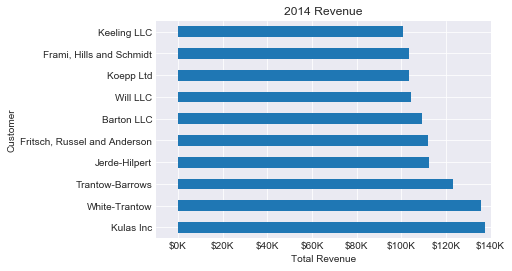

In [8]:
# Formatting revenue


def currency(x, pos):
    "The two args are the value and tick position"
    if x >= 1000000:
        return "${:1.1f}M".format(x * 1e-6)
    return "${:1.0f}K".format(x * 1e-3)


fig, ax = plt.subplots()
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel="Total Revenue", ylabel="Customer")
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

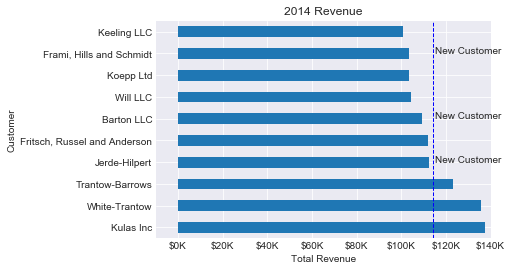

In [9]:
# Adding lines and annotations

# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
avg = top_10["Sales"].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel="Total Revenue", ylabel="Customer")

# Add a line for the average
ax.axvline(x=avg, color="b", label="Average", linestyle="--", linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

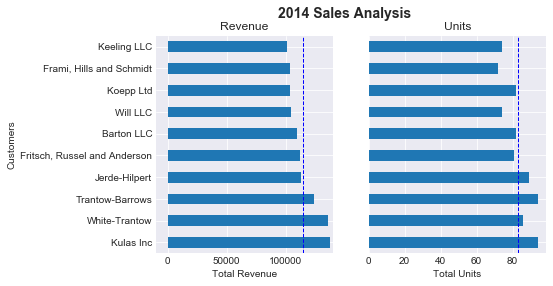

In [10]:
# Multiple axes

# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title="Revenue", xlabel="Total Revenue", ylabel="Customers")

# Plot the average as a vertical line
avg = top_10["Sales"].mean()
ax0.axvline(x=avg, color="b", label="Average", linestyle="--", linewidth=1)

# Repeat for the unit plot
top_10.plot(kind="barh", y="Purchases", x="Name", ax=ax1)
avg = top_10["Purchases"].mean()
ax1.set(title="Units", xlabel="Total Units", ylabel="")
ax1.axvline(x=avg, color="b", label="Average", linestyle="--", linewidth=1)

# Title the figure
fig.suptitle("2014 Sales Analysis", fontsize=14, fontweight="bold")

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

In [11]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

In [26]:
# Save figure

# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")
